In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive


**Dataset Selection**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/health_lifestyle_dataset (1).csv')

This dataset contains information related to individuals’ health conditions and daily lifestyle habits. It is designed to analyze how lifestyle factors such as exercise, sleep, and stress levels impact overall health.

The dataset includes variables such as:
- Demographic attributes (e.g., age, gender)
- Lifestyle habits (e.g., exercise hours, sleep duration)
- Health indicators (e.g., BMI, stress level)
- An overall health-related outcome variable

**Data Cleaning & Preprocessing**

In [2]:
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/health_lifestyle_dataset (1).csv')
mean_value = df['age'].mean()
median_value = df['bmi'].median()
mode_value = df['sleep_hours'].mode()
std_value = df['smoker'].std()

print(f"Std of 'Smokers': {std_value}")
print(f"Mean of 'Age': {mean_value}")
print(f"Median of 'BMI': {median_value}")
print(f"Mode of 'Sleep hours': {mode_value}")

Std of 'Smokers': 0.4006933526547463
Mean of 'Age': 48.52610052201044
Median of 'BMI': 29.0
Mode of 'Sleep hours': 0    8.5
Name: sleep_hours, dtype: float64


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/health_lifestyle_dataset (1).csv')

quantile_value = df['sleep_hours'].quantile()
print(f"Quantile of 'Sleep hours': {quantile_value}")

Quantile of 'Sleep hours': 6.5


In [4]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/health_lifestyle_dataset (1).csv")

print("Missing Values Per Column:")
print(df.isnull().sum())

print("Before Cleaning:")
print(df.head())


if "Age" in df.columns:
    df["Age_mean_imputed"] = df["Age"].fillna(df["Age"].mean())


if "Salary" in df.columns:
    df["Salary_median_imputed"] = df["Salary"].fillna(df["Salary"].median())



if "Gender" in df.columns:
    df["Gender_mode_imputed"] = df["Gender"].fillna(df["Gender"].mode()[0])


df["Custom_Replaced"] = df["SomeColumn"].fillna("Unknown") \
                        if "SomeColumn" in df.columns else None


df_removed = df.dropna()

print("\nRows After Removal:", len(df_removed))

print("\nAfter Cleaning:")
print(df.head())

df.to_csv("cleaned_data.csv", index=False)

Missing Values Per Column:
id                   0
age                  0
gender               0
bmi                  0
daily_steps          0
sleep_hours          0
water_intake_l       0
calories_consumed    0
smoker               0
alcohol              0
resting_hr           0
systolic_bp          0
diastolic_bp         0
cholesterol          0
family_history       1
disease_risk         0
dtype: int64
Before Cleaning:
   id  age  gender   bmi  daily_steps  sleep_hours  water_intake_l  \
0   1   56    Male  20.5         4198          3.9             3.4   
1   2   69  Female  33.3        14359          9.0             4.7   
2   3   46    Male  31.6         1817          6.6             4.2   
3   4   32  Female  38.2        15772          3.6             2.0   
4   5   60  Female  33.6         6037          3.8             4.0   

   calories_consumed  smoker  alcohol  resting_hr  systolic_bp  diastolic_bp  \
0               1602       0        0          97          161           1

In [7]:
import pandas as pd

df = pd.read_csv("/content/cleaned_data.csv")

duplicate_count_before = df.duplicated().sum()
print("Number of duplicate rows BEFORE removal:", duplicate_count_before)

print("\nDuplicate Rows:")
print(df[df.duplicated()])

df_no_duplicates = df.drop_duplicates()

duplicate_count_after = df_no_duplicates.duplicated().sum()
print("\nNumber of duplicate rows AFTER removal:", duplicate_count_after)

print("\nShape BEFORE:", df.shape)
print("Shape AFTER:", df_no_duplicates.shape)

df_no_duplicates.to_csv("cleaned_no_duplicates.csv", index=False)

Number of duplicate rows BEFORE removal: 0

Duplicate Rows:
Empty DataFrame
Columns: [id, age, gender, bmi, daily_steps, sleep_hours, water_intake_l, calories_consumed, smoker, alcohol, resting_hr, systolic_bp, diastolic_bp, cholesterol, family_history, disease_risk, Custom_Replaced]
Index: []

Number of duplicate rows AFTER removal: 0

Shape BEFORE: (99998, 17)
Shape AFTER: (99998, 17)


In [8]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv("/content/cleaned_no_duplicates.csv")

col = "age"

print("\n=== STATISTICAL SUMMARY BEFORE ===")
print(df[col].describe())

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print("\nIQR Outliers Found:", len(iqr_outliers))

df_iqr_clean = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("\n=== SUMMARY AFTER IQR TREATMENT ===")
print(df_iqr_clean[col].describe())

z_scores = np.abs(stats.zscore(df[col]))
threshold = 3

z_outliers = df[z_scores > threshold]
print("\nZ-score Outliers Found:", len(z_outliers))

df_z_clean = df[z_scores <= threshold]

print("\n=== SUMMARY AFTER Z-SCORE TREATMENT ===")
print(df_z_clean[col].describe())


=== STATISTICAL SUMMARY BEFORE ===
count    99998.000000
mean        48.526101
std         17.886925
min         18.000000
25%         33.000000
50%         48.000000
75%         64.000000
max         79.000000
Name: age, dtype: float64

IQR Outliers Found: 0

=== SUMMARY AFTER IQR TREATMENT ===
count    99998.000000
mean        48.526101
std         17.886925
min         18.000000
25%         33.000000
50%         48.000000
75%         64.000000
max         79.000000
Name: age, dtype: float64

Z-score Outliers Found: 0

=== SUMMARY AFTER Z-SCORE TREATMENT ===
count    99998.000000
mean        48.526101
std         17.886925
min         18.000000
25%         33.000000
50%         48.000000
75%         64.000000
max         79.000000
Name: age, dtype: float64


In [9]:
df.dtypes

,0
id,int64
age,int64
gender,object
bmi,float64
daily_steps,int64
sleep_hours,float64
water_intake_l,float64
calories_consumed,int64
smoker,int64
alcohol,int64


In [11]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
df['sleep_hours'] = pd.to_numeric(df['sleep_hours'], errors='coerce')
df['smoker'] = pd.to_numeric(df['smoker'], errors='coerce')

In [12]:
df['smoker'] = df['smoker'].map({'Yes':1, 'No':0})

In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler


df = pd.read_csv("/content/cleaned_no_duplicates.csv")


num_col = "id"
cat_col = "calories_consumed"

minmax = MinMaxScaler()
df["MinMax_" + num_col] = minmax.fit_transform(df[[num_col]])

standard = StandardScaler()
df["ZScore_" + num_col] = standard.fit_transform(df[[num_col]])

print("\n=== AFTER SCALING ===")
print(df[[num_col, "MinMax_" + num_col, "ZScore_" + num_col]].head())

df_encoded = pd.get_dummies(df, columns=[cat_col], drop_first=True)

print("\n=== AFTER ONE-HOT ENCODING ===")
print(df_encoded.head())


=== AFTER SCALING ===
   id  MinMax_id  ZScore_id
0   1    0.00000  -1.732077
1   2    0.00001  -1.732042
2   3    0.00002  -1.732008
3   4    0.00003  -1.731973
4   5    0.00004  -1.731939

=== AFTER ONE-HOT ENCODING ===
   id  age  gender   bmi  daily_steps  sleep_hours  water_intake_l  smoker  \
0   1   56    Male  20.5         4198          3.9             3.4       0   
1   2   69  Female  33.3        14359          9.0             4.7       0   
2   3   46    Male  31.6         1817          6.6             4.2       0   
3   4   32  Female  38.2        15772          3.6             2.0       0   
4   5   60  Female  33.6         6037          3.8             4.0       0   

   alcohol  resting_hr  ...  calories_consumed_3990  calories_consumed_3991  \
0        0          97  ...                   False                   False   
1        1          68  ...                   False                   False   
2        1          90  ...                   False                   F

**Feature Selection & Data Analysis**

Rows used for correlation: 99998

=== Pearson Correlation ===
Correlation: -0.0020290517806683746
P-value: 0.5211142709561296

=== Spearman Correlation ===
Correlation: -0.0020503065374862053
P-value: 0.5167586346180973


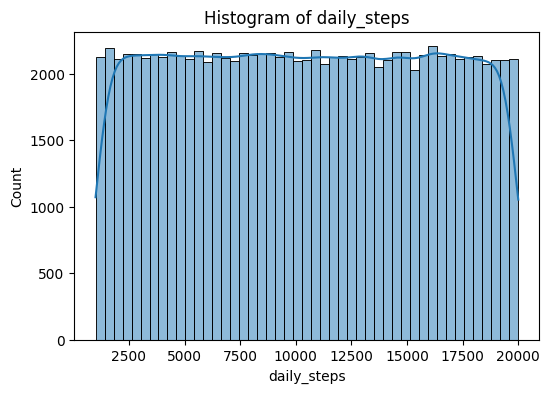

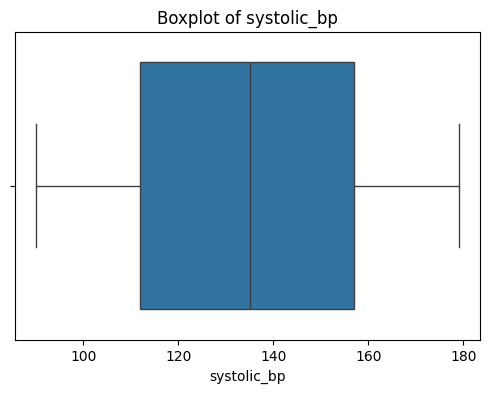

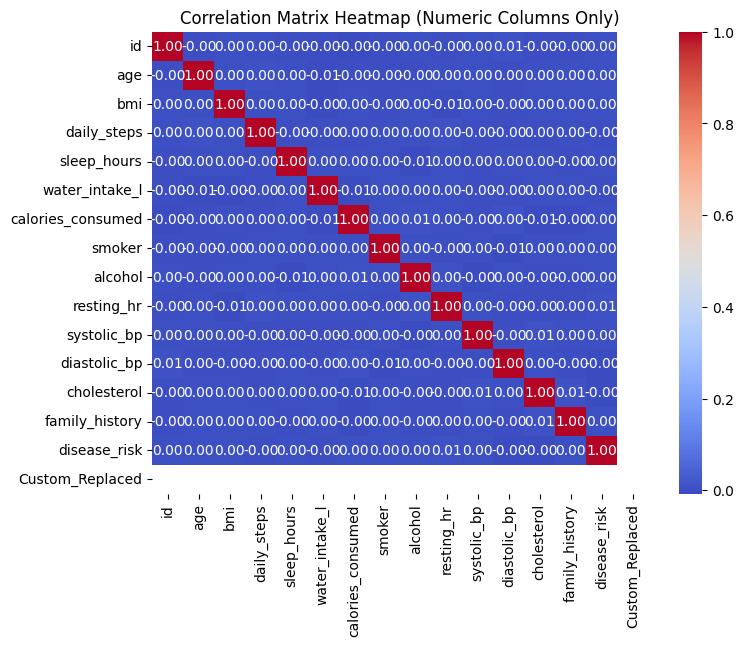

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


df = pd.read_csv("/content/cleaned_no_duplicates.csv")

col1 = "daily_steps"
col2 = "systolic_bp"


df[col1] = pd.to_numeric(df[col1], errors="coerce")
df[col2] = pd.to_numeric(df[col2], errors="coerce")

df_clean = df[[col1, col2]].dropna()

print("Rows used for correlation:", len(df_clean))

pearson_corr, pearson_p = stats.pearsonr(df_clean[col1], df_clean[col2])
print("\n=== Pearson Correlation ===")
print("Correlation:", pearson_corr)
print("P-value:", pearson_p)

spearman_corr, spearman_p = stats.spearmanr(df_clean[col1], df_clean[col2])
print("\n=== Spearman Correlation ===")
print("Correlation:", spearman_corr)
print("P-value:", spearman_p)

plt.figure(figsize=(6,4))
sns.histplot(df[col1], kde=True)
plt.title(f"Histogram of {col1}")
plt.show()


plt.figure(figsize=(6,4))
sns.boxplot(x=df[col2])
plt.title(f"Boxplot of {col2}")
plt.show()


plt.figure(figsize=(8,6))

numeric_df = df.select_dtypes(include=["number"])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap (Numeric Columns Only)")
plt.show()


In [16]:
import pandas as pd

df = pd.read_csv("/content/cleaned_no_duplicates.csv")
df.head()
df.shape        # rows & columns
df.info()       # data types
df.describe()   # statistical summary
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 0 to 99997
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 99998 non-null  int64  
 1   age                99998 non-null  int64  
 2   gender             99998 non-null  object 
 3   bmi                99998 non-null  float64
 4   daily_steps        99998 non-null  int64  
 5   sleep_hours        99998 non-null  float64
 6   water_intake_l     99998 non-null  float64
 7   calories_consumed  99998 non-null  int64  
 8   smoker             99998 non-null  int64  
 9   alcohol            99998 non-null  int64  
 10  resting_hr         99998 non-null  int64  
 11  systolic_bp        99998 non-null  int64  
 12  diastolic_bp       99998 non-null  int64  
 13  cholesterol        99998 non-null  int64  
 14  family_history     99997 non-null  float64
 15  disease_risk       99998 non-null  int64  
 16  Custom_Replaced    0 n

,0
id,0
age,0
gender,0
bmi,0
daily_steps,0
sleep_hours,0
water_intake_l,0
calories_consumed,0
smoker,0
alcohol,0


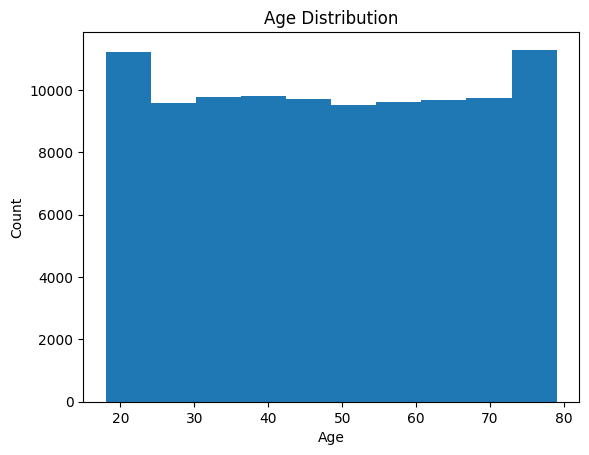

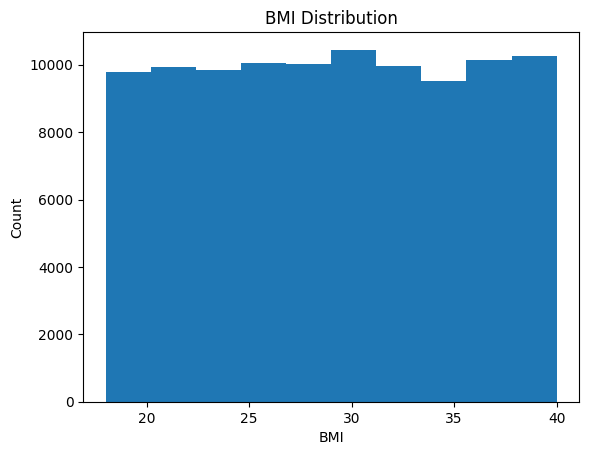

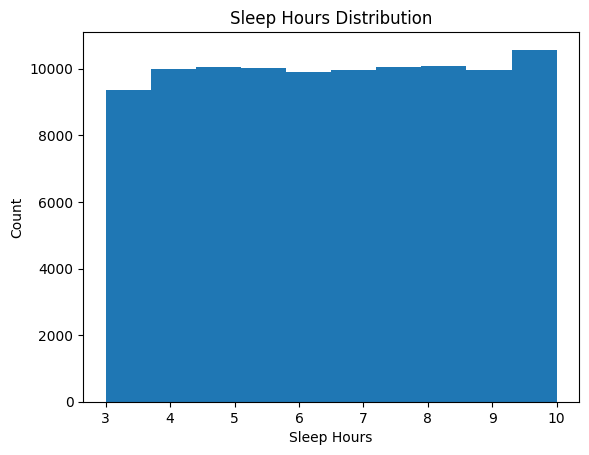

In [17]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=10)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.hist(df['bmi'], bins=10)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

plt.hist(df['sleep_hours'], bins=10)
plt.title("Sleep Hours Distribution")
plt.xlabel("Sleep Hours")
plt.ylabel("Count")
plt.show()


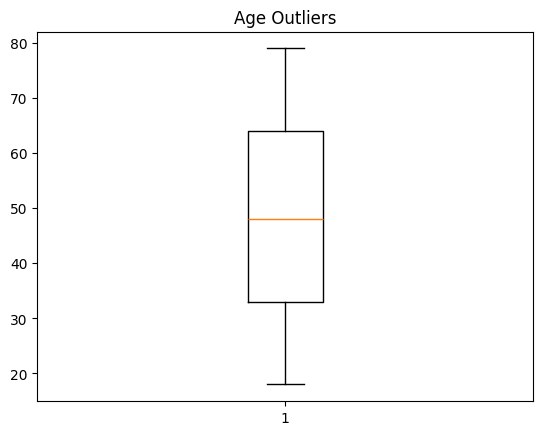

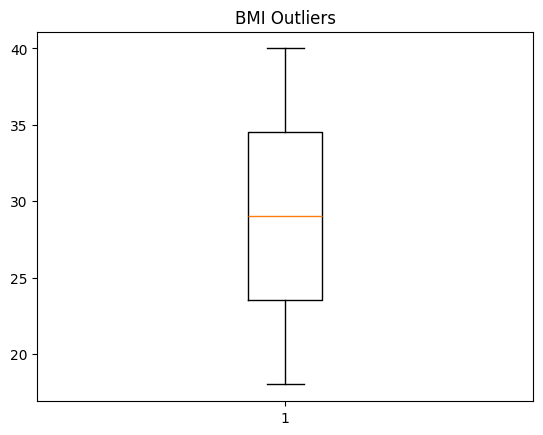

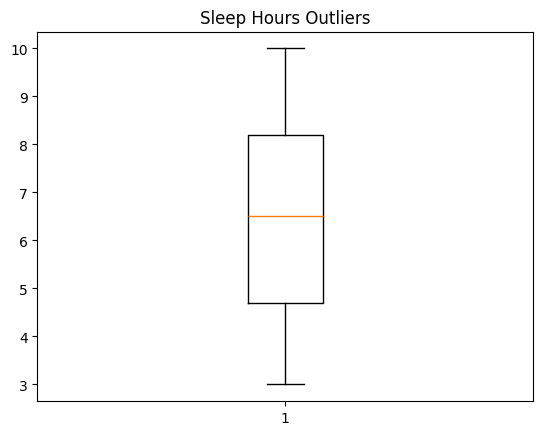

In [18]:
plt.boxplot(df['age'])
plt.title("Age Outliers")
plt.show()

plt.boxplot(df['bmi'])
plt.title("BMI Outliers")
plt.show()

plt.boxplot(df['sleep_hours'])
plt.title("Sleep Hours Outliers")
plt.show()


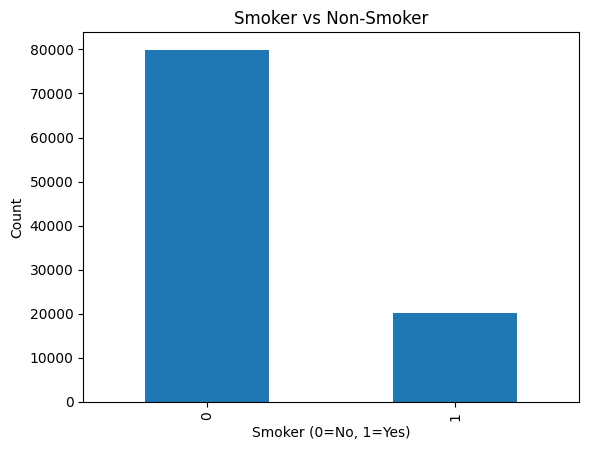

In [19]:
df['smoker'].value_counts().plot(kind='bar')
plt.title("Smoker vs Non-Smoker")
plt.xlabel("Smoker (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()


In [21]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,id,age,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk,Custom_Replaced
id,1.000000,-0.001401,0.001246,0.001478,-0.000694,-0.000544,-0.004481,-0.001106,0.003327,-0.002278,0.001638,0.005186,-0.001714,-0.001990,0.000311,NaN
age,-0.001401,1.000000,0.001206,0.004846,0.000436,-0.005643,-0.002678,-0.002442,-0.000914,0.001457,0.000806,0.000184,0.000741,0.002652,0.001671,NaN
bmi,0.001246,0.001206,1.000000,0.001824,0.000924,-0.003646,0.002247,-0.003441,0.002112,-0.006319,0.000800,-0.003117,0.002062,0.002275,0.003594,NaN
daily_steps,0.001478,0.004846,0.001824,1.000000,-0.001211,-0.000872,0.000294,0.000440,0.003446,0.004399,-0.002029,-0.003540,0.000129,0.002334,-0.003470,NaN
sleep_hours,-0.000694,0.000436,0.000924,-0.001211,1.000000,0.001509,0.001230,0.001057,-0.006331,0.002628,0.000182,0.002244,0.003050,-0.001880,0.002580,NaN
water_intake_l,-0.000544,-0.005643,-0.003646,-0.000872,0.001509,1.000000,-0.007574,0.001572,0.003677,0.000874,-0.003263,-0.001317,0.002568,0.001999,-0.001868,NaN
calories_consumed,-0.004481,-0.002678,0.002247,0.000294,0.001230,-0.007574,1.000000,0.002178,0.005596,0.000894,-0.000156,0.004251,-0.005196,-0.004854,0.002718,NaN
smoker,-0.001106,-0.002442,-0.003441,0.000440,0.001057,0.001572,0.002178,1.000000,0.002412,-0.001428,0.003672,-0.007366,0.001039,0.002698,0.001102,NaN
alcohol,0.003327,-0.000914,0.002112,0.003446,-0.006331,0.003677,0.005596,0.002412,1.000000,0.004578,-0.004603,0.003451,-0.003568,-0.002977,0.000498,NaN
resting_hr,-0.002278,0.001457,-0.006319,0.004399,0.002628,0.000874,0.000894,-0.001428,0.004578,1.000000,0.000792,-0.001750,-0.001727,0.000115,0.005436,NaN


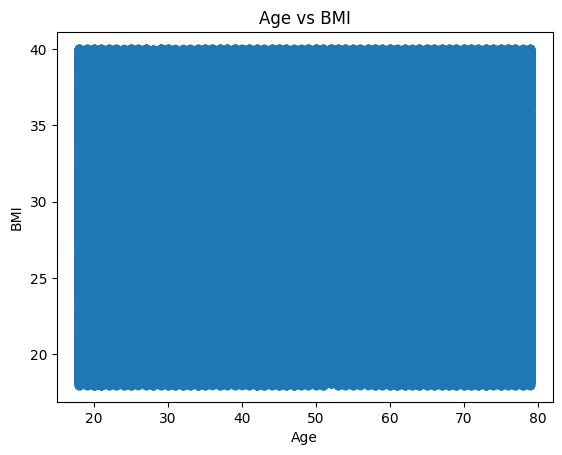

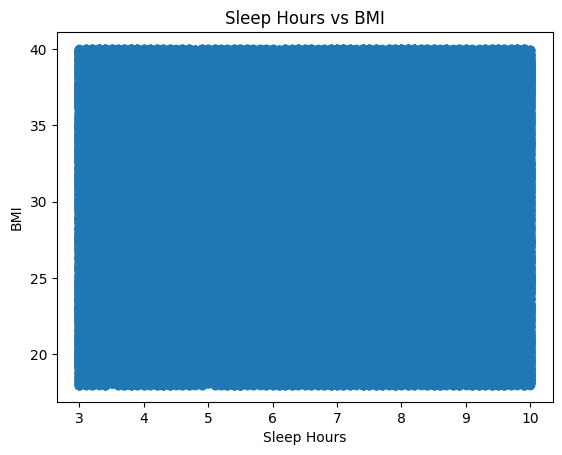

In [22]:
plt.scatter(df['age'], df['bmi'])
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Age vs BMI")
plt.show()

plt.scatter(df['sleep_hours'], df['bmi'])
plt.xlabel("Sleep Hours")
plt.ylabel("BMI")
plt.title("Sleep Hours vs BMI")
plt.show()


**Performance Evaluation**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Features and target
X = df[['age', 'bmi', 'sleep_hours']]
y = df['smoker']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Decision Tree model
dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=42
)

# Train model
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7989

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     15982
           1       0.00      0.00      0.00      4018

    accuracy                           0.80     20000
   macro avg       0.40      0.50      0.44     20000
weighted avg       0.64      0.80      0.71     20000



Confusion Matrix:
 [[15978     4]
 [ 4018     0]]


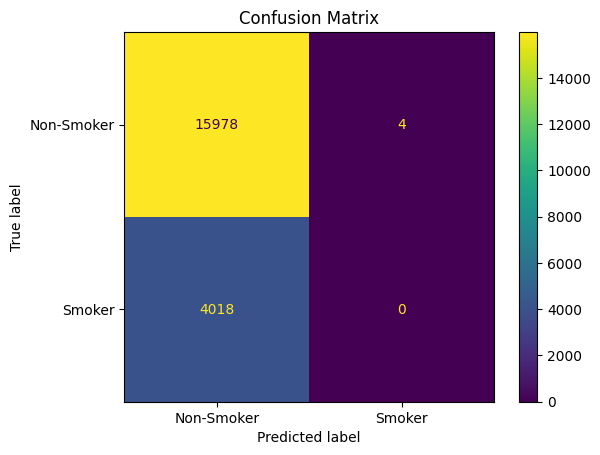

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# True vs Predicted
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Smoker', 'Smoker'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Features & target
X_reg = df[['age', 'sleep_hours']]
y_reg = df['bmi']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Train regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predictions
y_pred = reg.predict(X_test)

# MSE & RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)


MSE: 39.879166829933055
RMSE: 6.314995394292308


**Decision Making Using AI / ML Algorithms**

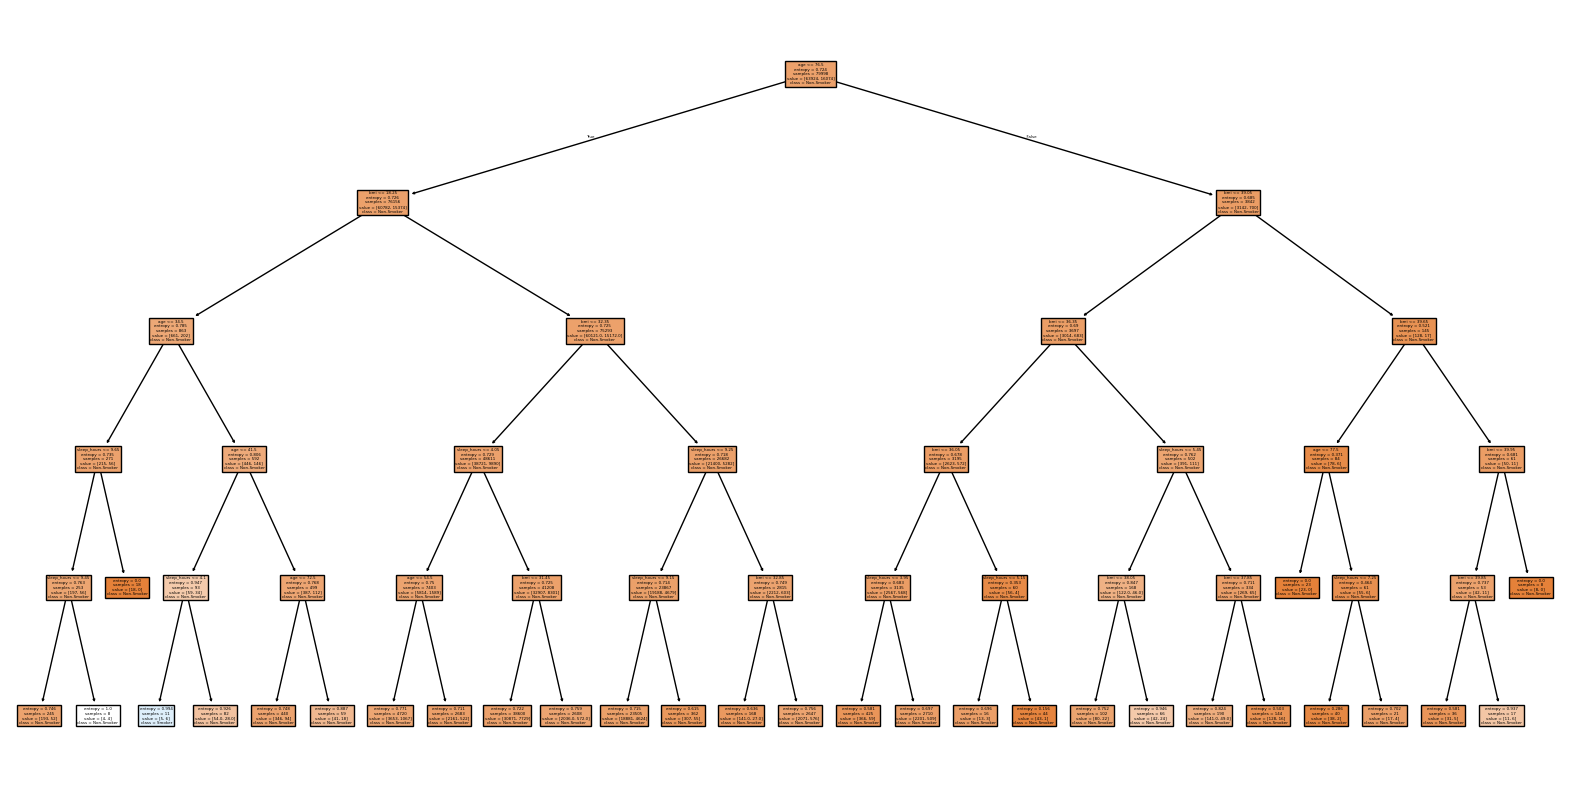

In [26]:
plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=['Non-Smoker', 'Smoker'],
    filled=True
)
plt.show()

**Data Visualization**

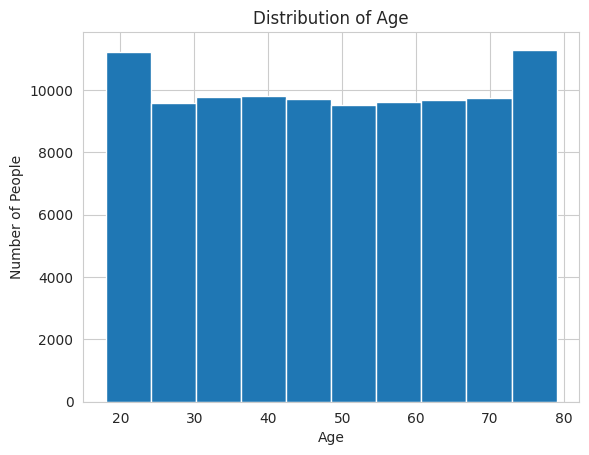

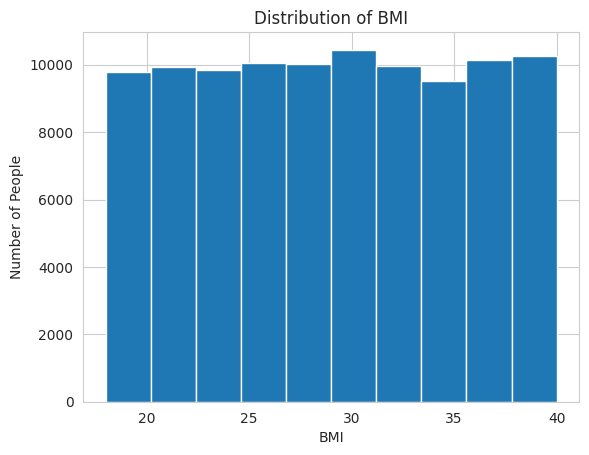

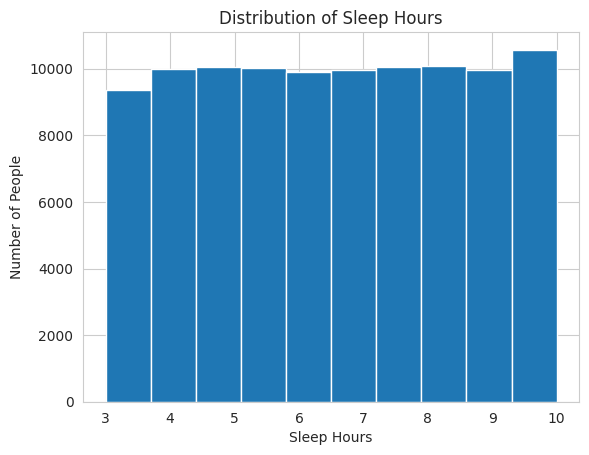

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=10)
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.title("Distribution of Age")
plt.show()

plt.hist(df['bmi'], bins=10)
plt.xlabel("BMI")
plt.ylabel("Number of People")
plt.title("Distribution of BMI")
plt.show()

plt.hist(df['sleep_hours'], bins=10)
plt.xlabel("Sleep Hours")
plt.ylabel("Number of People")
plt.title("Distribution of Sleep Hours")
plt.show()


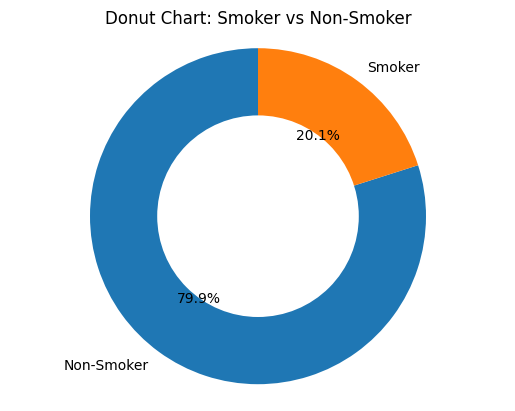

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv('/content/cleaned_no_duplicates.csv')

# Count smoker vs non-smoker
counts = df['smoker'].value_counts().sort_index()  # 0 = Non-Smoker, 1 = Smoker
labels = ['Non-Smoker', 'Smoker']

# Create pie chart
plt.figure()
wedges, texts, autotexts = plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)

# Create donut hole
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Donut Chart: Smoker vs Non-Smoker")
plt.axis('equal')  # keeps the circle round
plt.show()



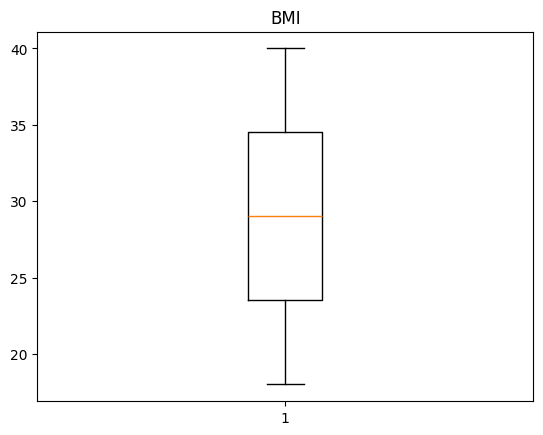

In [31]:
plt.boxplot(df['bmi'])
plt.title("BMI")
plt.show()

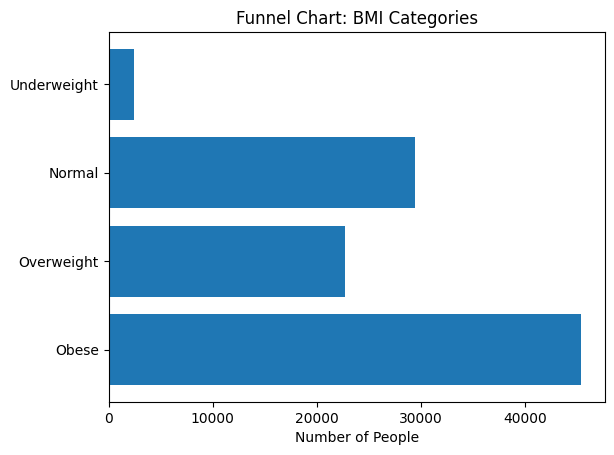

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv('/content/cleaned_no_duplicates.csv')

# Create BMI categories (funnel stages)
bins = [0, 18.5, 25, 30, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels)

# Count people in each stage
counts = df['bmi_category'].value_counts().reindex(labels)

# Funnel chart (horizontal bars)
plt.figure()
plt.barh(labels, counts.values)
plt.xlabel("Number of People")
plt.title("Funnel Chart: BMI Categories")
plt.gca().invert_yaxis()   # makes it look like a funnel
plt.show()


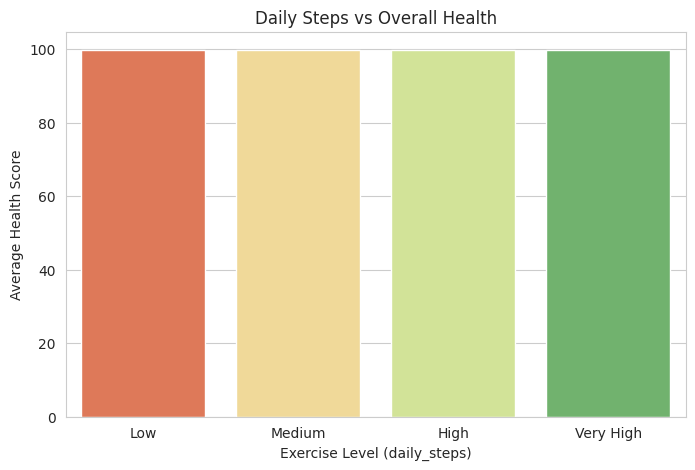

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/cleaned_no_duplicates.csv')

# Create a placeholder for overall_health_score for demonstration
# Assuming lower disease risk means higher health score
df['overall_health_score'] = 100 - df['disease_risk']

# Categorize daily_steps as a proxy for exercise hours
df['exercise_level'] = pd.cut(
    df['daily_steps'],
    bins=[0, 5000, 10000, 15000, float('inf')],
    labels=['Low', 'Medium', 'High', 'Very High'],
    include_lowest=True
)

# Compute average health score
avg_health = (
    df.groupby('exercise_level', observed=True)
      ['overall_health_score']
      .mean()
      .reset_index()
)

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_health,
    x='exercise_level',
    y='overall_health_score',
    hue='exercise_level',
    palette='RdYlGn',
    legend=False
)

plt.xlabel("Exercise Level (daily_steps)")
plt.ylabel("Average Health Score")
plt.title("Daily Steps vs Overall Health")
plt.show()

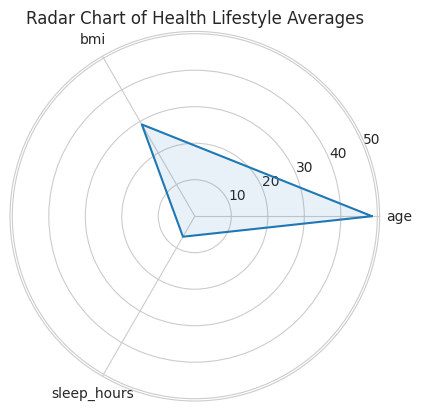

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv('/content/cleaned_no_duplicates.csv')

# Calculate mean values of numerical columns
labels = ['age', 'bmi', 'sleep_hours']
values = [
    df['age'].mean(),
    df['bmi'].mean(),
    df['sleep_hours'].mean()
]

# Close the radar chart loop
values = values + [values[0]]

# Create angles
angles = np.linspace(0, 2 * np.pi, len(labels) + 1)

# Create radar plot
plt.figure()
ax = plt.axes(polar=True)

ax.plot(angles, values)
ax.fill(angles, values, alpha=0.1)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("Radar Chart of Health Lifestyle Averages")

plt.show()
